Image Blue Region Detection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Calculating Lower HSV bounds and Upper HSV bounds

In [ ]:
import cv2
import numpy as np

image = cv2.imread('/content/drive/MyDrive/DATASETS/blue_color_image.png')

# Converting to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

x, y, w, h = 100, 100, 50, 50  # Example ROI (x, y, width, height)
roi = hsv_image[y:y+h, x:x+w]  # Crop the region

min_hsv = np.min(roi, axis=(0, 1))
max_hsv = np.max(roi, axis=(0, 1))

print(f"Lower HSV bound: {min_hsv}")
print(f"Upper HSV bound: {max_hsv}")


Lower HSV bound: [110  22 227]
Upper HSV bound: [117  57 236]


Calculating Blue region Percentage

Percentage of blue region in the image: 66.97%


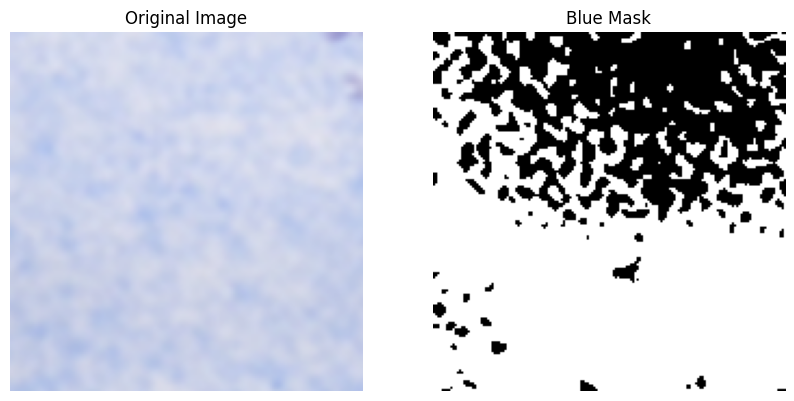

In [ ]:
import matplotlib.pyplot as plt

image = cv2.imread('/content/drive/MyDrive/DATASETS/blue_color_image.png')

if image is None:
    print("Error: Image not found or path is incorrect.")
else:
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Defining the lower and upper bounds for the blue color
    lower_hsv = np.array([110, 22, 227])  # Example lower bound
    upper_hsv = np.array([117, 57, 236])  # Example upper bound

    # Creating a binary mask for the blue region
    blue_mask = cv2.inRange(hsv_image, lower_hsv, upper_hsv)

    # Counting the number of blue pixels
    blue_pixels = cv2.countNonZero(blue_mask)

    total_pixels = image.shape[0] * image.shape[1]

    # Calculating the percentage of blue pixels
    blue_percentage = (blue_pixels / total_pixels) * 100

    print(f"Percentage of blue region in the image: {blue_percentage:.2f}%")

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(blue_mask, cmap='gray')
    plt.title('Blue Mask')
    plt.axis('off')

    plt.show()
